<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keras-tutorial-&amp;-CNN" data-toc-modified-id="Keras-tutorial-&amp;-CNN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keras tutorial &amp; CNN</a></span><ul class="toc-item"><li><span><a href="#Problem-review-:-SIGNS-Dataset" data-toc-modified-id="Problem-review-:-SIGNS-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem review : SIGNS Dataset</a></span></li><li><span><a href="#Basic-knowledge-of-CNN" data-toc-modified-id="Basic-knowledge-of-CNN-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Basic knowledge of CNN</a></span></li><li><span><a href="#basic-block" data-toc-modified-id="basic-block-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>basic block</a></span></li><li><span><a href="#build-model" data-toc-modified-id="build-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>build model</a></span></li><li><span><a href="#visualize-your-model" data-toc-modified-id="visualize-your-model-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>visualize your model</a></span></li><li><span><a href="#train-your-model" data-toc-modified-id="train-your-model-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>train your model</a></span></li><li><span><a href="#prediect" data-toc-modified-id="prediect-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>prediect</a></span></li><li><span><a href="#save-model" data-toc-modified-id="save-model-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>save model</a></span></li><li><span><a href="#load-model" data-toc-modified-id="load-model-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>load model</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Problem-statement:-MNIST-Dataset" data-toc-modified-id="Problem-statement:-MNIST-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Problem statement: MNIST Dataset</a></span></li></ul></li><li><span><a href="#Additional-question" data-toc-modified-id="Additional-question-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Additional question</a></span><ul class="toc-item"><li><span><a href="#Resnet" data-toc-modified-id="Resnet-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Resnet</a></span></li></ul></li></ul></div>

# Keras tutorial & CNN

Welcome to this assignment, you will:
1. Learn to use Keras, a high-level neural networks API (programming framework), written in Python and capable of running on top of several lower-level frameworks including TensorFlow and CNTK. 
2. See how you can in a couple of hours build a deep learning algorithm.

Why are we using Keras? Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. Being able to go from idea to result with the least possible delay is key to finding good models. However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you can implement in TensorFlow but not (without more difficulty) in Keras. That being said, Keras will work fine for many common models. 

In this exercise, you'll work on the "SIGNS Dataset" problem, which we'll explain below. Let's load the required packages and solve the problem of the Happy House!

## Problem review : SIGNS Dataset

In the previous assignment, you built helper functions using numpy to understand the mechanics behind convolutional neural networks. Most practical applications of deep learning today are built using programming frameworks, which have many built-in functions you can simply call. 

As usual, we will start by loading in the packages. 

In [57]:
from cnn_utils import load_dataset, convert_to_one_hot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
%matplotlib inline

Run the next cell to load the "SIGNS" dataset you are going to use.

In [3]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 2


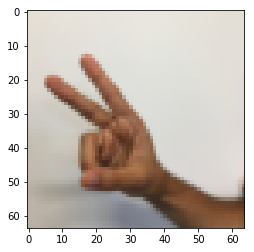

In [4]:
# Example of a picture
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In Course 2, you had built a fully-connected network for this dataset. But since this is an image dataset, it is more natural to apply a ConvNet to it.

To get started, let's examine the shapes of your data. 

In [5]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


## Basic knowledge of CNN
You will learn:
1. [convolution](./images/conv_kiank.mp4)
2. padding
3. stride
4. pooling

ALL of these based on [slides](http://cs230.stanford.edu/files/C4M1.pdf) by Andrew Ng

## basic block

In [6]:
def conv_bn_relu(filters,kernel_size,strides,inputs,bn_axis=3):
    '''
    CONV -> BN -> RELU Block applied to inputs
    
    '''
    
    X = Conv2D(filters, kernel_size, strides = strides)(inputs)
    X = BatchNormalization(axis = bn_axis)(X)
    outputs = Activation('relu')(X)
    return outputs

## build model

In [38]:
def cnn_model(input_shape,output_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
   
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X_1_zeropadding = ZeroPadding2D((3, 3))(X_input)
    
    # layer group1 32*32*32
    # CONV -> BN -> RELU Block applied to X
    X_1=conv_bn_relu(filters=32,kernel_size=(7, 7), strides = (1, 1),inputs=X_1_zeropadding)
    X_1_pooling = MaxPooling2D((2, 2))(X_1)
    
    #layer group2 16*16*64
    X_2_zeropadding = ZeroPadding2D((2, 2))(X_1_pooling)
    
    # CONV -> BN -> RELU Block applied to X
    X_2=conv_bn_relu(filters=64,kernel_size=(5, 5), strides = (1, 1),inputs=X_2_zeropadding)
    X_2_pooling = MaxPooling2D((2, 2))(X_2)
    
    #layer group3 8*8*128
    X_3_zeropadding = ZeroPadding2D((1, 1))(X_2_pooling)
    # CONV -> BN -> RELU Block applied to X
    X_3=conv_bn_relu(filters=128,kernel_size=(3, 3), strides = (1, 1),inputs=X_3_zeropadding)
    X_3_pooling = MaxPooling2D((2, 2))(X_3)
    
    #layer group4 8*8*64
    # CONV -> BN -> RELU Block applied to X
    X_4=conv_bn_relu(filters=64,kernel_size=(1, 1), strides = (1, 1),inputs=X_3_pooling)
    X_4_pooling = MaxPooling2D((2, 2))(X_4)
    
    #layer group5 4*4*32
    X_5_zeropadding = ZeroPadding2D((1, 1))(X_4)
    # CONV -> BN -> RELU Block applied to X
    X_5=conv_bn_relu(filters=32,kernel_size=(3, 3), strides = (1, 1),inputs=X_5_zeropadding)
    X_5_pooling = MaxPooling2D((2, 2))(X_5)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X_flatten = Flatten()(X_5_pooling)
    X_dense = Dense(128, activation='relu')(X_flatten)
    outputs = Dense(output_shape, activation='softmax')(X_dense)

    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = outputs)
    
    ### END CODE HERE ###
    
    return model

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).


In [39]:
model= cnn_model(input_shape=(64,64,3),output_shape=6)

## visualize your model

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_11 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 36, 36, 32)        0         
__________

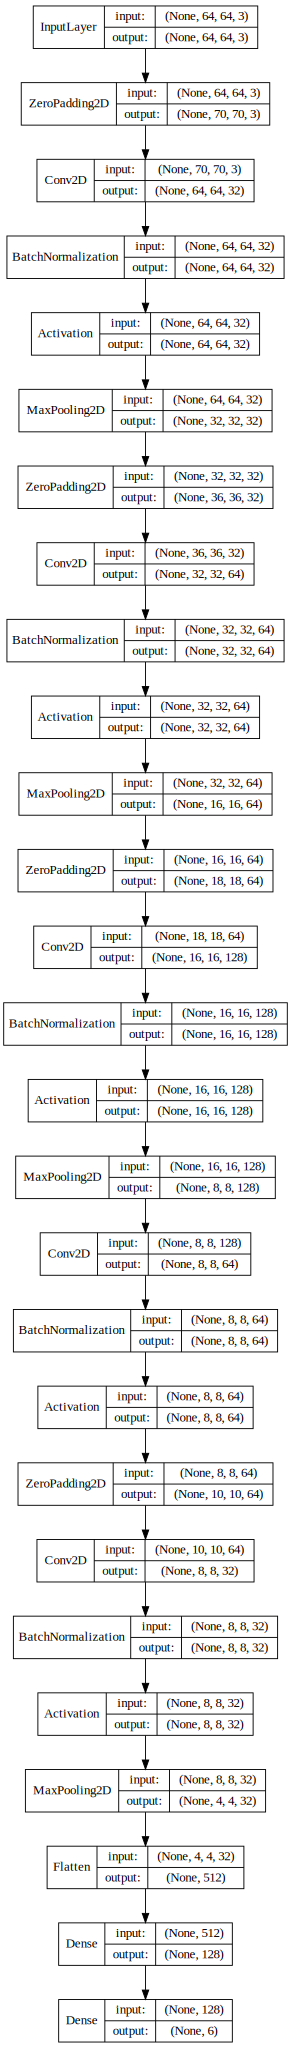

In [41]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True,show_layer_names=False).create(prog='dot', format='svg'))

## train your model

In [42]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [43]:
model.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16,validation_data=(X_test,Y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/20
1080/1080 [==============================] - 3s 3ms/step - loss: 1.0716 - acc: 0.6074 - val_loss: 1.8464 - val_acc: 0.1667
Epoch 2/20
1080/1080 [==============================] - 1s 588us/step - loss: 0.3872 - acc: 0.8657 - val_loss: 2.0249 - val_acc: 0.2917
Epoch 3/20
1080/1080 [==============================] - 1s 717us/step - loss: 0.1403 - acc: 0.9583 - val_loss: 2.1159 - val_acc: 0.3750
Epoch 4/20
1080/1080 [==============================] - 1s 823us/step - loss: 0.0638 - acc: 0.9880 - val_loss: 2.4968 - val_acc: 0.3833
Epoch 5/20
1080/1080 [==============================] - 1s 789us/step - loss: 0.0509 - acc: 0.9870 - val_loss: 0.8726 - val_acc: 0.6917
Epoch 6/20
1080/1080 [==============================] - 1s 849us/step - loss: 0.0570 - acc: 0.9889 - val_loss: 8.6207 - val_acc: 0.1917
Epoch 7/20
1080/1080 [==============================] - 1s 838us/step - loss: 0.1859 - acc: 0.9333 - val_loss: 2.7637 - val_acc: 0.3500
Epo

## prediect 

In [44]:
y_pred=np.argmax(model.predict(X_test),axis=1)

In [45]:
y_pred

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 5, 2, 3, 0, 3, 0, 2,
       3, 1, 1, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
       0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 1, 3])

## save model

In [46]:
model.save('./my_cnn.h5')

## load model

In [47]:
del model

In [49]:
from tensorflow.keras.models import load_model
model = load_model('./my_cnn.h5')

In [50]:
model.evaluate(X_test,Y_test)

120/120 [==============================] - 1s 5ms/step


[0.034929737790177266, 0.9833333333333333]

# Homework

You need fit and predict MNIST datasets using CNN

## Problem statement: MNIST Dataset

In [58]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

y = 0


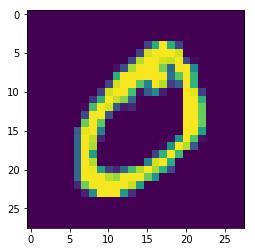

In [59]:
# Example of a picture
index = 1
plt.imshow(X_train[index].reshape(28,28))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

**Exercise**: Implement a `cnn_model()`. This assignment is more open-ended than most. We suggest that you start by implementing a model using the architecture we suggest, and run through the rest of this assignment using that as your initial model. But after that, come back and take initiative to try out other model architectures. For example, you might take inspiration from the model above, but then vary the network architecture and hyperparameters however you wish. You can also use other functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`. 

# Additional question 

## Resnet

A deep residual network (deep ResNet) is a type of specialized neural network that helps to handle more sophisticated deep learning tasks and models. It has received quite a bit of attention at recent IT conventions, and is being considered for helping with the training of deep networks.

Resnet is the most powerful network of computer vision, so please learn [Resnet](./Residual+Networks+-+v2.ipynb) by coding